In [1]:
import sys, os
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division
sys.path.append('..')
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### Create Database File

In [2]:
from data_import import BatchSimDataImporter
data_importer = BatchSimDataImporter('../test/data/Crosswind_sweeps_monte_carlo_nightly_1531')
data_importer.create_database('../test/data/1531/db.h5')

Loading data from ../test/data/Crosswind_sweeps_monte_carlo_nightly_1531/overview_data.json.
Done.
Creating database ../test/data/1531/db.h5
Done.


### Create Simulation Data Object

In [3]:
from simdata import SimData
simdata = SimData('../test/data/1531/db.h5')

Loading file ../test/data/1531/db.h5
Done.


### Explore the Simulation Data Object

In [4]:
print(os.path.abspath(simdata.hdf_fn))

/home/joelbenito/makani/analysis/util/simdata_analysis/test/data/1531/db.h5


In [5]:
pprint(simdata.get_metadata())

{'commit': '5de578adfaa060a620c159b6c8aa2e5b6c285995',
 'date': '2018-10-26 08:23',
 'seed': 12345,
 'title': 'Crosswind Monte Carlo 2018-10-26 08:23 '}


In [6]:
pprint(simdata.scorelist[0:5])
pprint(simdata.tablelist[0:5])

['-Crash- HoverFullLength Tether Height AGL Min. [m]',
 '-Crash- CrosswindNormal Tether Height AGL Min. [m]',
 '-Crash- Min Kite Height Above Ground Level [m]',
 '-Crash- Hover - Reel Tether Elevation [deg]',
 '-Crash- >20[m] CrosswindNormal Max. Tether Sphere Deviation (radius = 434 m) [m]']
['Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 1, shear exponent = 0',
 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 3, shear exponent = 0',
 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 5, shear exponent = 0',
 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0',
 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 9, shear exponent = 0']


In [7]:
print(simdata.num_scores)

115


### Explore Scores and Tables

In [8]:
simdata.find_score('tether') # See the top 5 scores containing 'tether'

Score 'tether' has not been found. These are the closest:
  1: 'TransIn Max Tether Tension [kN]'
  2: 'Hover - Transform to Perch Min Tether Tension [kN]'
  3: 'Hover - Perch to Transform Min Tether Tension [kN]'
  4: '-Crash- HoverFullLength Tether Height AGL Min. [m]'
  5: 'TransIn Rud % Saturated [% time]'
Using 'TransIn Max Tether Tension [kN]'.


'TransIn Max Tether Tension [kN]'

In [9]:
simdata.get_score_info('perch transform min tether tension') # Eyeball the score name

Score 'perch transform min tether tension' has not been found. These are the closest:
  1: 'Hover - Perch to Transform Min Tether Tension [kN]'
  2: 'Hover - Transform to Perch Min Tether Tension [kN]'
  3: 'TransIn Max Tether Tension [kN]'
  4: '>20[m] CrosswindNormal Min Tether Tension [kN]'
  5: 'HoverTransformGsDown Tether Elevation [4] [deg]'
Using 'Hover - Perch to Transform Min Tether Tension [kN]'.


{'index': 33,
 'name': 'Hover - Perch to Transform Min Tether Tension [kN]',
 'severity': 4,
 'units': '-'}

In [10]:
simdata.get_table_info('AGL = 7 exponent = 0.1')

Table 'AGL = 7 exponent = 0.1' has not been found. These are the closest:
  1: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.1'
  2: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 9, shear exponent = 0.1'
  3: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.2'
  4: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 5, shear exponent = 0.1'
  5: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 3, shear exponent = 0.1'
Using 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.1'.


{'index': 11,
 'numjobs': 49,
 'title': 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.1'}

### Explore the VariableData Object

In [11]:
scoredata = simdata.get_var_data('perch transform min tether tension', 'AGL = 7 exponent = 0.1')

Score 'perch transform min tether tension' has not been found. These are the closest:
  1: 'Hover - Perch to Transform Min Tether Tension [kN]'
  2: 'Hover - Transform to Perch Min Tether Tension [kN]'
  3: 'TransIn Max Tether Tension [kN]'
  4: '>20[m] CrosswindNormal Min Tether Tension [kN]'
  5: 'HoverTransformGsDown Tether Elevation [4] [deg]'
Using 'Hover - Perch to Transform Min Tether Tension [kN]'.
Table 'AGL = 7 exponent = 0.1' has not been found. These are the closest:
  1: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.1'
  2: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 9, shear exponent = 0.1'
  3: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.2'
  4: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 5, shear exponent = 0.1'
  5: 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 3, shear exponent = 0.1'
Using 'Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.1'.


In [12]:
print(scoredata) # Overloaded to show nice things about the score

Variable: Hover - Perch to Transform Min Tether Tension [kN]
Variable index: 33
Units: -
Severity: 4
Table: Monte Carlo Wind Speed [m/s] @ 21 [m] AGL = 7, shear exponent = 0.1
Table index: 11
Range (min, max): (-1.81080503111, 2.08606720865)
Histogram: 
                           40.8 %
-1.81: ####################
-1.42: ############
-1.03: ####
-0.64: #####
-0.25: ####
0.14 : ##
0.53 : #
0.92 : 
1.31 : 
1.70 : #



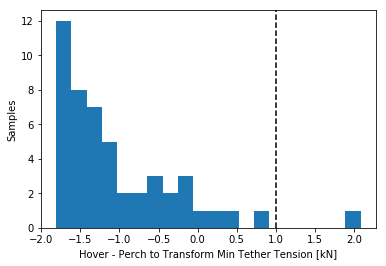

In [13]:
# Plot the histogram
hist_fig = scoredata.hist(bins=20)
plt.axvline(x=1, color='k', linestyle='--') # Plot an additional line
plt.show()

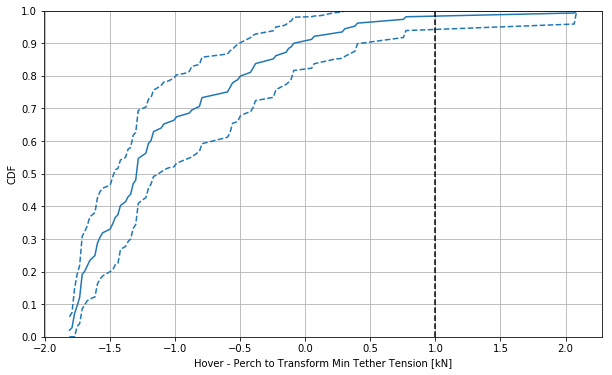

In [14]:
# Plot the ECDF
cdf_fig = scoredata.ecdf()
plt.axvline(x=1, color='k', linestyle='--') # Plot an additional line
cdf_fig.set_size_inches(10, 6) # Figure can be resized
plt.show()

### Explore the Statistic Object

In [15]:
score_mean = scoredata.mean()
print(score_mean) # Also overloaded

Mean: -1.03172711486
Confidence bounds (95%): (-1.2393034301000947, -0.790601535373317)
Histogram: 
                           25.5 %
-1.34: 
-1.27: ###
-1.20: ############
-1.12: ####################
-1.05: ##################
-0.98: ###########
-0.90: #######
-0.83: ##
-0.75: 
-0.68: 



In [16]:
print(score_mean.mean) # Yes, the mean of the mean

-1.0317271148632117


In [17]:
print(score_mean.get_percentile(99)) # The 99% of the mean (the highest expected mean)

-0.7246971192354805


In [18]:
print(score_mean.bounds) # 2.5% and 97.5% bounds (95% confidence interval)

(-1.2393034301000947, -0.790601535373317)


In [19]:
score_prob_above_threshold = scoredata.prob_above(1.)
print(score_prob_above_threshold) # Compare against the ECDF above at score = 1

Mean: 0.0200408163265
Confidence bounds (95%): (0.0, 0.061224489795918324)
Histogram: 
                          38.7 %
0.00: ##################
0.01: 
0.02: ####################
0.03: #########
0.04: 
0.05: ##
0.06: 
0.07: 
0.08: 
0.09: 



In [20]:
print(score_prob_above_threshold.mean)

0.02004081632653061


In [21]:
print(score_prob_above_threshold.bounds)

(0.0, 0.061224489795918324)


### Analyze the Probability of all Scores Above Threshold

In [22]:
from score_prob import process_score_probabilities, plot_score_prob
folderlist = ['../test/data/Crosswind_sweeps_monte_carlo_nightly_1531']
output_folder = '../test/data/1531'
score_thr = 0.999 # Not 1 so the torque ratio scores (which are exactly 100 when bad) get captured as bad.

process_score_probabilities(folderlist, output_folder, score_thr, use_concurrency=True, ncores=None)

Loading data from ../test/data/Crosswind_sweeps_monte_carlo_nightly_1531/overview_data.json.
Done.
Creating database ../test/data/1531/db.h5
Done.
Creating simulation data object...
Loading file ../test/data/1531/db.h5
Done.
...done.
Computing probabilities...
Using 6 cores (out of 8).
  10% completed.
  20% completed.
  30% completed.
  40% completed.
  50% completed.
  60% completed.
  70% completed.
  80% completed.
  90% completed.
  100% completed.
...done.
Saving mean probability data to file ../test/data/1531/prob_mean.csv
Saving probability lower bound data to file ../test/data/1531/prob_low.csv
Saving probability higher bound data to file ../test/data/1531/prob_high.csv
Done.


In [23]:
# Have a quick peek at one of the tables in the CSV using pandas
import pandas as pd
pd.read_csv("../test/data/1531/prob_mean.csv", nrows=3, header=1)

,Unnamed: 0,Wind speed [m/s],1,3,5,7,9,11,13,15
NaN,Shear exponent 0,0.0,0.019800,0.0,0.0,0.0,0.0,0.0,0.0,NaN
NaN,Shear exponent 0.1,0.0,0.020959,0.0,0.0,0.0,0.0,0.0,0.0,NaN
NaN,Shear exponent 0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### Plot Probabilities Above Threshold for all Wind Speeds

Loading data from ../test/data/Crosswind_sweeps_monte_carlo_nightly_1556/overview_data.json.
Done.
Creating database ../test/data/1556/db.h5
Done.
Creating simulation data object...
Loading file ../test/data/1556/db.h5
Done.
...done.
Score '-Crash- >5[m] payout Hover - PayOut Tether Elevation [deg]' has not been found. These are the closest:
  1: '-Crash- >5[m] payout, Hover - PayOut Tether Elevation [deg]'
  2: '-Crash- >5[m] payout, Hover - ReelIn Tether Elevation [deg]'
  3: '-Crash- HoverTransformGsUp Tether Elevation [3] [deg]'
  4: '-Crash- HoverTransformGsDown Tether Elevation [4] [deg]'
  5: '-Crash- HoverTransformGsDown Tether Elevation [3] [deg]'
Using '-Crash- >5[m] payout, Hover - PayOut Tether Elevation [deg]'.
Score '-Crash- >5[m] payout Hover - ReelIn Tether Elevation [deg]' has not been found. These are the closest:
  1: '-Crash- >5[m] payout, Hover - ReelIn Tether Elevation [deg]'
  2: '-Crash- >5[m] payout, Hover - PayOut Tether Elevation [deg]'
  3: '-Crash- HoverTra

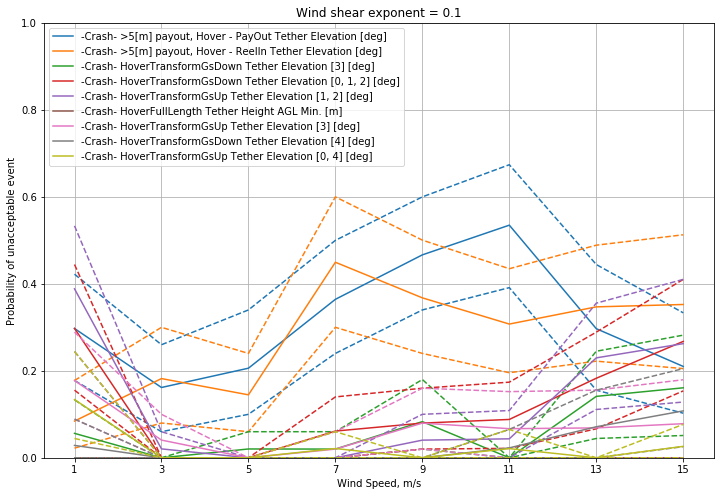

In [24]:
# Get a plot of a subset of probabilties for all wind speeds and a specific wind shear
folderlist = ['../test/data/Crosswind_sweeps_monte_carlo_nightly_1556']
output_folder = '../test/data/1556'

# Create database
db_fn = os.path.join(output_folder,'db.h5')
bsdi = BatchSimDataImporter(folderlist)
bsdi.create_database(db_fn)

# Create simdata object
print('Creating simulation data object...')
simdata = SimData(db_fn)
print('...done.')
        
hover_crash_scores_of_interest = [
    '-Crash- >5[m] payout Hover - PayOut Tether Elevation [deg]',
    '-Crash- >5[m] payout Hover - ReelIn Tether Elevation [deg]',
    '-Crash- HoverTransformGsDown Tether Elevation [3] [deg]',
    '-Crash- HoverTransformGsDown Tether Elevation [0 1 2] [deg]',
    '-Crash- HoverTransformGsUp Tether Elevation [1 2] [deg]',
    '-Crash- HoverFullLength Tether Height AGL Min. [m]',
    '-Crash- HoverTransformGsUp Tether Elevation [3] [deg]',
    '-Crash- HoverTransformGsDown Tether Elevation [4] [deg]',
    '-Crash- HoverTransformGsUp Tether Elevation [0 4] [deg]']

fig_crash = plot_score_prob(simdata, hover_crash_scores_of_interest, wind_shear=0.1, score_thr=0.999)
plt.show()

### Compare two batch sims

In [25]:
from compare_simdata import compare_simulation_data
output_folder = '../test/data/compare_1524_1531'

print('Creating prior DB...')
folderlist_prior = ['../test/data/Crosswind_sweeps_monte_carlo_nightly_1524']
prior_db_fn = os.path.join(output_folder, 'prior.h5')
BatchSimDataImporter(folderlist_prior).create_database(prior_db_fn)
simdata_prior = SimData(prior_db_fn)
print('...done.')

print('Creating post DB...')
folderlist_post = ['../test/data/Crosswind_sweeps_monte_carlo_nightly_1531']
post_db_fn = os.path.join(output_folder, 'post.h5')
BatchSimDataImporter(folderlist_post).create_database(post_db_fn)
simdata_post = SimData(post_db_fn)
print('...done.')

score_thr = 0.999 # Not 1 so the torque ratio scores (which are exactly 100 when bad) get captured as bad.

compare_simulation_data(simdata_prior, simdata_post, os.path.join(output_folder, 'comp.csv'), score_thr, use_concurrency=True, ncores=None)

Creating prior DB...
Loading data from ../test/data/Crosswind_sweeps_monte_carlo_nightly_1524/overview_data.json.
Done.
Creating database ../test/data/compare_1524_1531/prior.h5
Done.
Loading file ../test/data/compare_1524_1531/prior.h5
Done.
...done.
Creating post DB...
Loading data from ../test/data/Crosswind_sweeps_monte_carlo_nightly_1531/overview_data.json.
Done.
Creating database ../test/data/compare_1524_1531/post.h5
Done.
Loading file ../test/data/compare_1524_1531/post.h5
Done.
...done.
Using 6 cores (out of 8).
Comparing simulations...
  10% completed.
  20% completed.
  30% completed.
  40% completed.
  50% completed.
  60% completed.
  70% completed.
  80% completed.
  90% completed.
  100% completed.
...done.
Writing file ../test/data/compare_1524_1531/comp.csv...
...done.
